Q2: Shall we make a short movie or a long movie?

In [ ]:
# Load packages
install.packages('ggplot2')
install.packages('readr')
library(ggplot2)
library(readr)

In [2]:
# Load the movie dataset
movie <- read.csv("/Users/Xuhuiz2/Desktop/movie.csv")

In [3]:
# Convert the Adj Gross revenue from factor into numeric, while getting rid of the commas to avoid NA's
movie$Adjusted_Gross2 <- as.numeric(gsub(",", "", as.character(movie$Adjusted_Gross)))
movie$profit2<- as.numeric(gsub(",","",as.character(movie$Profit)))

In [4]:
# Assgin labels to runtime
runtime<-with(movie, movie$Runtime_min <- 
                ifelse(Runtime_min < 50, "under 50",    
                       ifelse(Runtime_min >= 50 & Runtime_min < 100, "50-100",
                              ifelse(Runtime_min >= 100 & Runtime_min < 150,"100-150",
                                     ifelse(Runtime_min >= 150 & Runtime_min < 200,"150-200",
                                            ifelse(Runtime_min >= 200,"over 200","n/a"))))))
movie$runtime <- factor(runtime, levels = c("under 50","50-100","100-150","150-200","over 200"))

Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

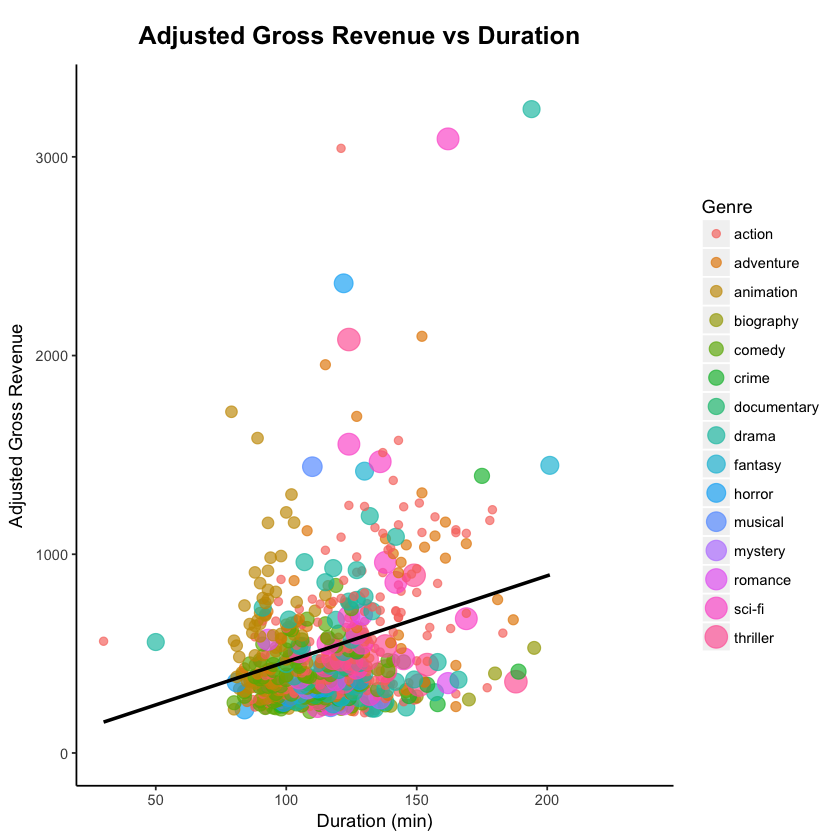

In [5]:
# Plot a scatterplot, add a trendline
# Runtime_min vs Adj Gross Rev for all genres, ylim=3300 removes "Gone with the wind" as it's mostly like an outlier
runtime_vs_agr <- ggplot(movie, aes(x = Runtime_min, y = Adjusted_Gross2,color=Genre,size=Genre)) + geom_point(alpha=2/3) + geom_smooth(method = "lm",fill=NA,color='black',size=1) + xlab("Duration (min)") + ylab("Adjusted Gross Revenue") + labs(title = "Adjusted Gross Revenue vs Duration") + ylim(0,3300)

runtime_vs_agr + theme(panel.background = element_rect(fill='white'), plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)), axis.line = element_line(colour = "black"), panel.grid.major = element_blank(), panel.grid.minor = element_line(colour='white'), panel.border = element_blank())

In [6]:
# Assess the correlation between Runtime_min and Adj Gross Rev: 0.3414147
cor(movie$Runtime_min, movie$Adjusted_Gross2, method="pearson")

[1] 0.3414147

In [7]:
# select top 5 Genre thaht has most sample size to do further analysis on Runtime_min vs Adj Gross Rev: action, adventure, animation, comedy and drama
filtergenre <- movie$Genre %in% c("action","adventure","animation","comedy","drama")
movie_filtergenre <- movie[filtergenre,]
action <- subset(movie_filtergenre,movie_filtergenre[,3] == "action")
adventure <- subset(movie_filtergenre,movie_filtergenre[,3] == "adventure")
animation <- subset(movie_filtergenre,movie_filtergenre[,3] == "animation")
comedy <- subset(movie_filtergenre,movie_filtergenre[,3] == "comedy")
drama <- subset(movie_filtergenre,movie_filtergenre[,3] == "drama")

cor(action$Runtime_min, action$Adjusted_Gross2, method="pearson") #0.36
cor(adventure$Runtime_min, adventure$Adjusted_Gross2, method="pearson") #0.29
cor(animation$Runtime_min, animation$Adjusted_Gross2, method="pearson") #-0.04
cor(comedy$Runtime_min, comedy$Adjusted_Gross2, method="pearson") #0.15
cor(drama$Runtime_min, drama$Adjusted_Gross2, method="pearson") #0.66

[1] 0.3612586

[1] 0.2921127

[1] -0.04391757

[1] 0.1575119

[1] 0.6597401

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

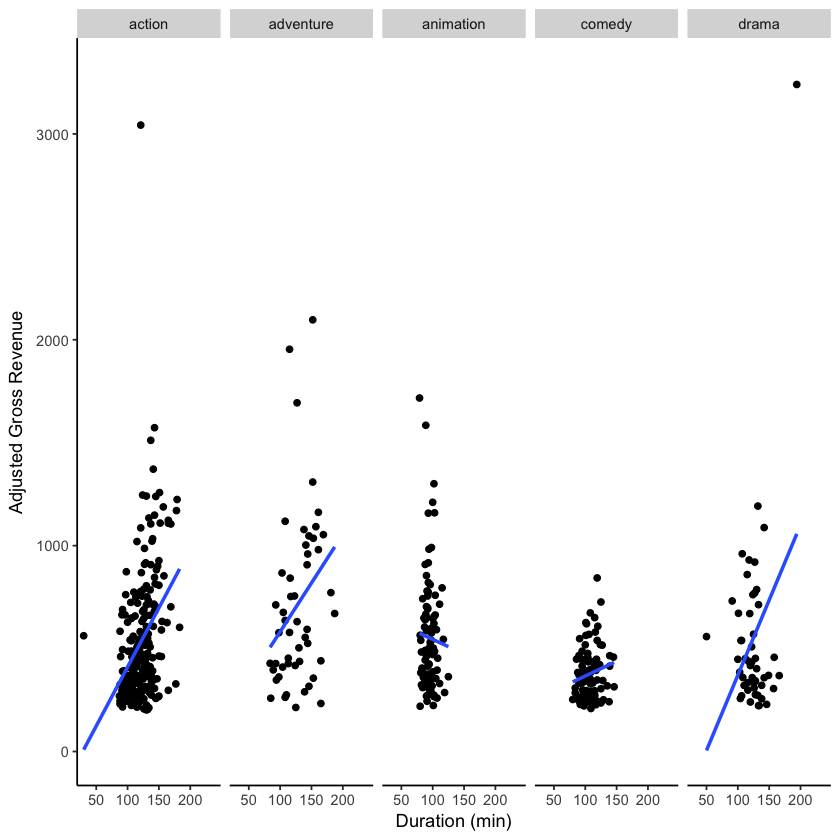

In [8]:
# Plot all five genres scatter plot
p1 <- ggplot(movie_filtergenre, aes(x=Runtime_min, y=Adjusted_Gross2))+
  geom_point() 
p1 + facet_grid( ~ movie_filtergenre$Genre) + ylim(0,3300) + geom_smooth(method="lm", fill=NA) +
  theme(panel.background = element_rect(fill='white'),
        plot.title = element_text(hjust = 0.4, size=15, face = "bold", margin = margin(10, 0, 10, 0)),
        axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_line(colour = 'white'),
        panel.border = element_blank()) +
  ylab("Adjusted Gross Revenue")+
  xlab("Duration (min)")

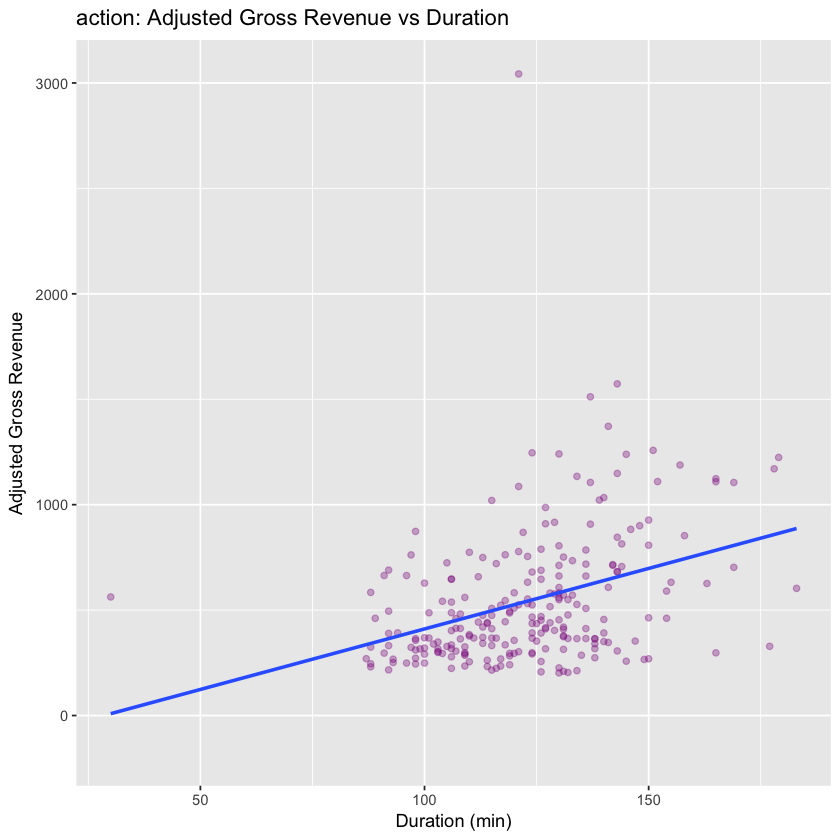

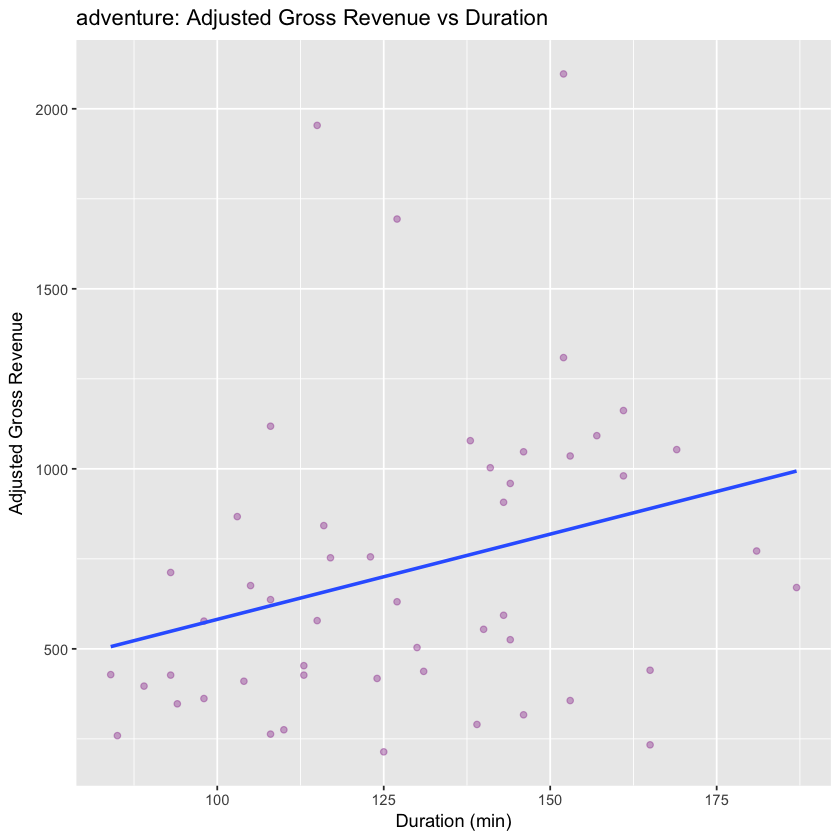

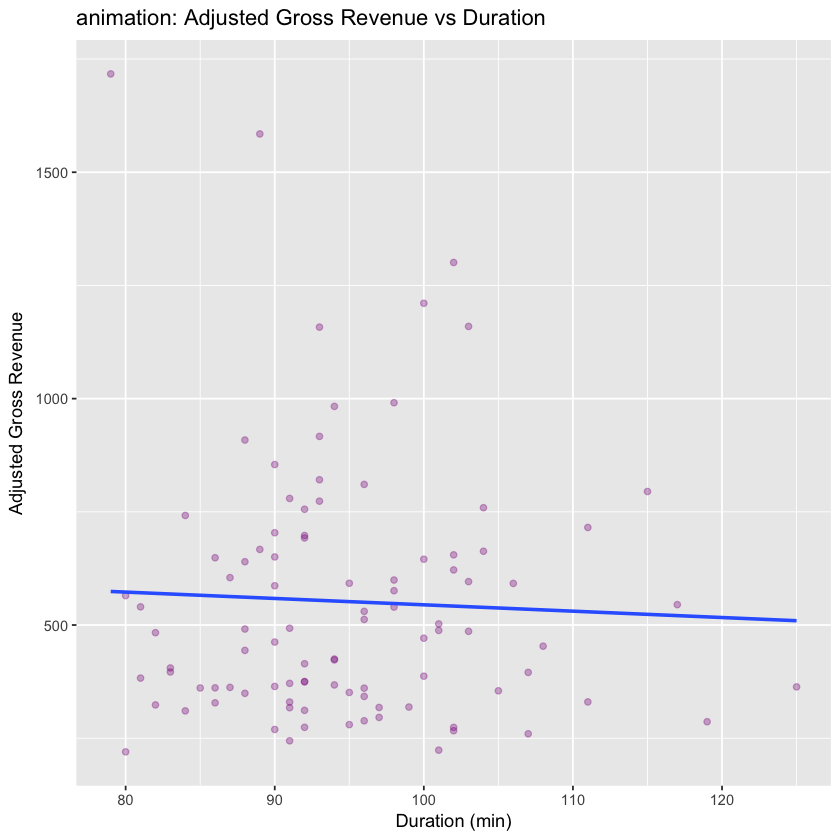

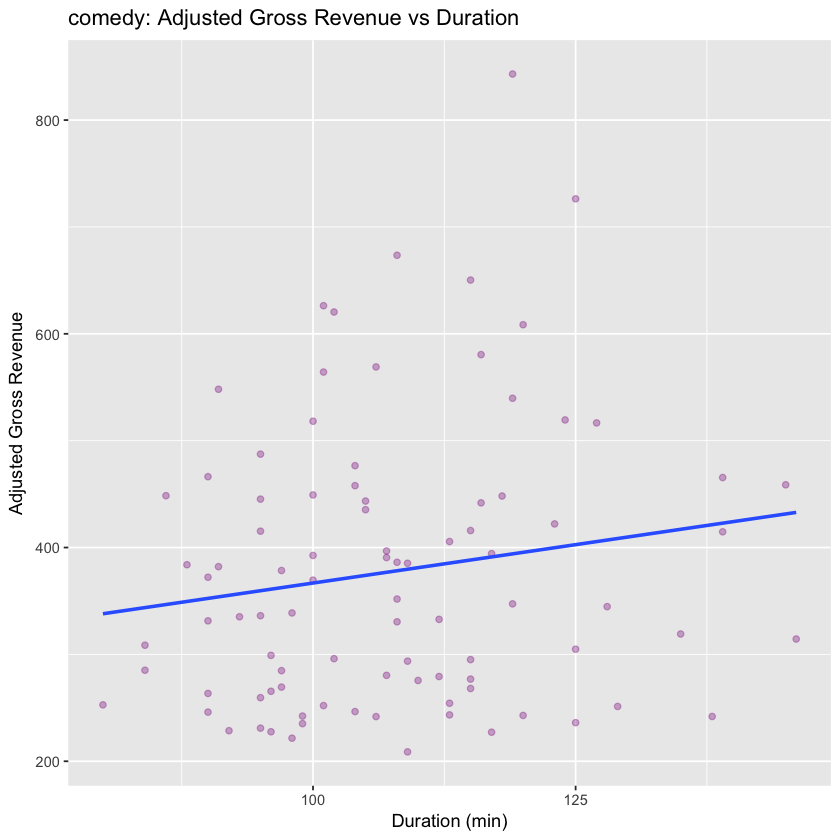

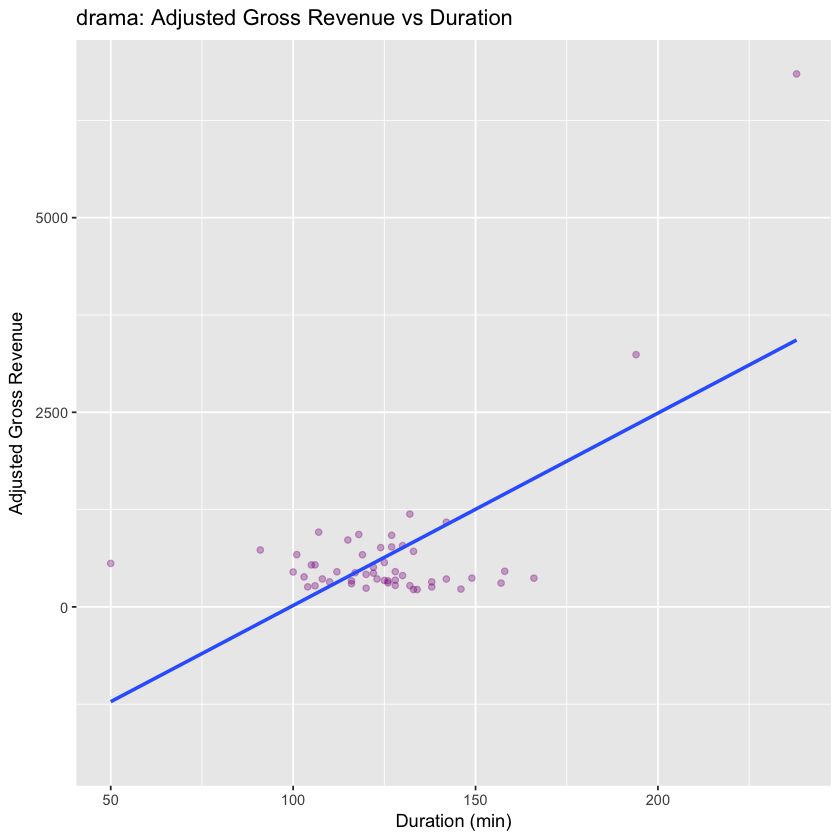

In [9]:
# Plot scatterplot seperately for each of top 5 genres
# For action
ggplot(data = action, aes(x = Runtime_min, y = Adjusted_Gross2)) + 
  geom_point(alpha = 1/3,color = 'dark magenta')+ 
  geom_smooth(method="lm",fill = NA) + 
  xlab("Duration (min)") + ylab("Adjusted Gross Revenue") +
  labs(title = "action: Adjusted Gross Revenue vs Duration")

# For adventure
ggplot(data = adventure, aes(x = Runtime_min, y = Adjusted_Gross2)) + 
  geom_point(alpha = 1/3,color = 'dark magenta') + 
  geom_smooth(method="lm",fill = NA) +
  xlab("Duration (min)") + ylab("Adjusted Gross Revenue") +
  labs(title = "adventure: Adjusted Gross Revenue vs Duration")

# For animation
ggplot(data = animation, aes(x = Runtime_min, y = Adjusted_Gross2)) + 
  geom_point(alpha = 1/3, color = 'dark magenta')+
  geom_smooth(method="lm",fill = NA) + 
  xlab("Duration (min)") + ylab("Adjusted Gross Revenue") +
  labs(title = "animation: Adjusted Gross Revenue vs Duration")

# For comedy
ggplot(data = comedy, aes(x = Runtime_min, y = Adjusted_Gross2)) + 
  geom_point(alpha = 1/3,color = 'dark magenta') +
  geom_smooth(method="lm",fill = NA) + 
  xlab("Duration (min)") + ylab("Adjusted Gross Revenue") +
  labs(title = "comedy: Adjusted Gross Revenue vs Duration")

# For drama
ggplot(data = drama, aes(x = Runtime_min, y = Adjusted_Gross2)) + 
  geom_point(alpha = 1/3,color = 'dark magenta') + 
  geom_smooth(method="lm",fill = NA) + 
  xlab("Duration (min)") + ylab("Adjusted Gross Revenue") +
  labs(title = "drama: Adjusted Gross Revenue vs Duration")

Warning message:
“Removed 1 rows containing missing values (geom_bar).”

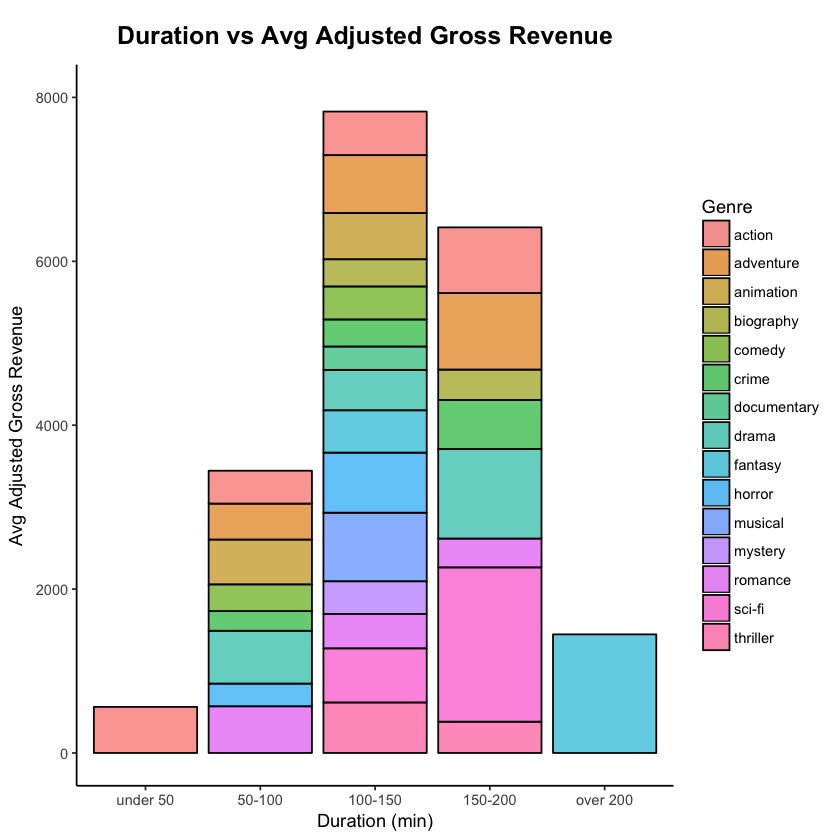

In [10]:
# plot duration and revenue bar to see which duration makes most money
# All genres bar
run2<- ggplot(movie,aes(x=runtime,y=Adjusted_Gross2))+
  geom_bar(alpha=2/3,colour="black",stat = "summary",fun.y = "mean",aes(fill=Genre)) +
  xlab("Duration (min)") + ylab("Avg Adjusted Gross Revenue") +
  labs(title = "Duration vs Avg Adjusted Gross Revenue") +
  ylim(0,8000) 
run2+theme(panel.background = element_rect(fill='white'),
           plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
           axis.line = element_line(colour = "black"),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_line(colour='white'),
           panel.border = element_blank())

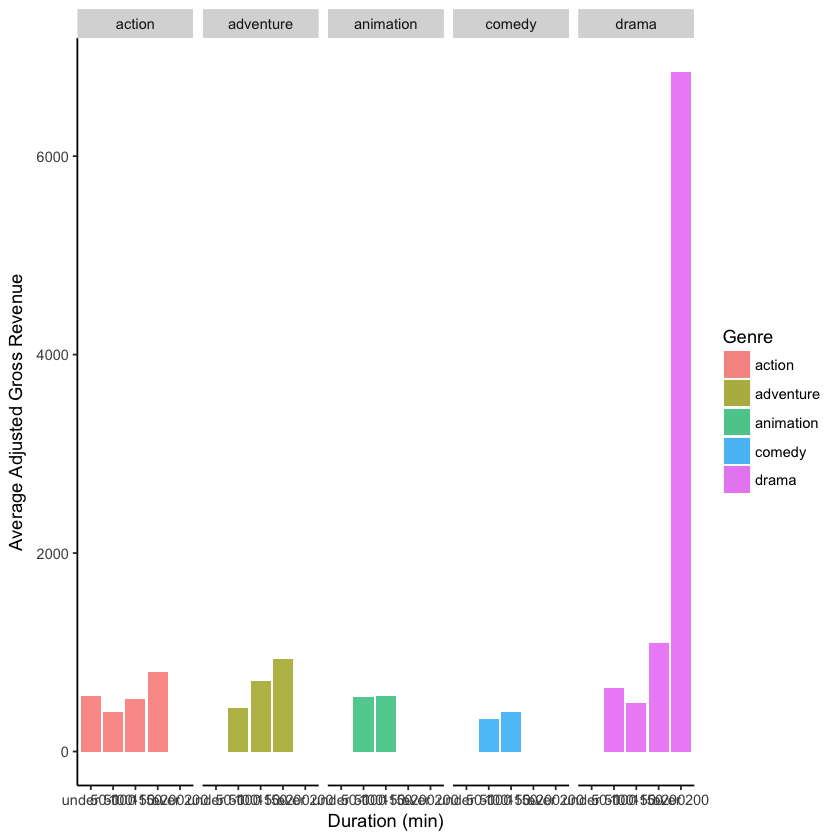

In [11]:
# Top 5 genres bar
# Avg revenue
p2<- ggplot(movie_filtergenre,aes(x=runtime,y=Adjusted_Gross2))+
  geom_bar(stat = "summary",fun.y = "mean",aes(fill = Genre),alpha=3/4)
p2+facet_grid( .~ movie_filtergenre$Genre)  +
  theme(panel.background = element_rect(fill='white'),
        plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
        axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_line(colour='white'),
        panel.border = element_blank()) +
  ylab("Average Adjusted Gross Revenue")+
  xlab("Duration (min)")